Generation 10
Generation 20
Generation 30
Generation 40
Generation 50
Generation 60
Generation 70
Generation 80
Generation 90
Generation 100
Generation 110
Generation 120
Generation 130
Generation 140
Generation 150
Generation 160
Generation 170
Generation 180
Generation 190
Generation 200


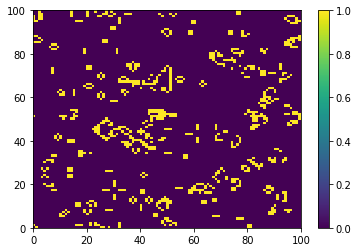

In [ ]:
import numpy as np
import pylab as pl
import random

class GoL:

   def __init__(self, N=100, T=200, WF=5):
      self.N = N
      self.old_grid = np.zeros(N*N, dtype='i').reshape(N,N)
      self.new_grid = np.zeros(N*N, dtype='i').reshape(N,N)
      self.T = T # number of generations
      self.WF = WF # write frequency = how often to save generations

      # Initialization of random grid
      for i in range(0, self.N):
         for j in range(0, self.N):
            if(random.randint(0, 100) < 15):
               self.old_grid[i][j] = 1
            else:
               self.old_grid[i][j] = 0
      
   def live_cells(self, i, j):
      # Counts number of live cells around point (i, j)
      s = 0 # Live cell counter
      for x in [i-1, i, i+1]:
         for y in [j-1, j, j+1]:
            if(x == i and y == j):
               continue # Skip current cell
            if(x != self.N and y != self.N):
               s += self.old_grid[x][y]
            # The remaining branches handle the case where the live cell is off the end of the grid.
            # In this case, we loop back round such that the grid becomes a "toroidal array".
            elif(x == self.N and y != self.N):
               s += self.old_grid[0][y]
            elif(x != self.N and y == self.N):
               s += self.old_grid[x][0]
            else:
               s += self.old_grid[0][0]
      return s

   def play(self):
      
      # Save generation zero
      pl.pcolormesh(self.old_grid)
      pl.colorbar()
      pl.savefig("generation0.png")

      t = 1 # Current generation
      while t <= self.T:
         if t%10==0:
             # Only print update at tenth generations
             print('Generation %d' % t)

         # Apply Conway's rules
         for i in range(self.N):
            for j in range(self.N):
               live = self.live_cells(i, j)
               if(self.old_grid[i][j] == 1 and live < 2):
                  self.new_grid[i][j] = 0 # Dead from starvation
               elif(self.old_grid[i][j] == 1 and (live == 2 or live == 3)):
                  self.new_grid[i][j] = 1 # Continue living
               elif(self.old_grid[i][j] == 1 and live > 3):
                  self.new_grid[i][j] = 0 # Dead from overcrowding
               elif(self.old_grid[i][j] == 0 and live == 3):
                  self.new_grid[i][j] = 1 # Alive from reproduction

         # Output the new grid configuration
         if(t % self.WF == 0):
            pl.pcolormesh(self.new_grid)
            pl.savefig('generation%d.png' % t)

         # New grid is now old grid
         self.old_grid = self.new_grid.copy()

         # Move to next generation
         t += 1

if(__name__ == "__main__"):
   game = GoL(N = 100, T = 200, WF = 5)
   game.play()

import glob
from PIL import Image

   # Create list of each .png file
images = []
for img in glob.glob("*.png"):
    images.append(Image.open(img)) 

# Save animated .gif
images[0].save('GoL_movie.gif', save_all=True, append_images=images[0:], duration=850, loop=0)

# Type  ![title](GoL_movie.gif)  in markdown cell to view animated gif